### Sales data analysis

In [9]:
import sys
import warnings
import pandas as pd
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
df=pd.read_csv('C:/Users/QLC/Downloads/test_log.csv',encoding = "ISO-8859-1")

df['counter'] = df['No of times activity']
df['counter'][df['counter']>1]=1

for i in range(len(df['Opprotunity na,e'])-1):
    if df['Opprotunity na,e'][i+1]==df['Opprotunity na,e'][i]:
        df['counter'][i+1]=df['counter'][i]+1
    elif df['Opprotunity na,e'][i+1]!=df['Opprotunity na,e'][i]:
        df['counter'][i+1]=1
    elif i == len(df['Opprotunity na,e']):
        break        
df.head()

,Company,Industry,"Opprotunity na,e",Price,BU,Opportunity date,Probability,Opportunity date changed,Probability close date changes,Probability changed,...,Terriotory,Opportunity type,Stage,FPR,SPR,Terriotory.1,Opportunity source,days taken,No of times activity,counter
0,Hindustan Motor Finance Corporation Limited,Automotive,Version Upgrade | IQuinox ver.6 to PostMaster ...,54000,Chennai - RB,00:00.,50,0,1,0,...,South,Upgrade,Proposal,Devaraj N,S Manjula,South,Existing Client,21,1,1
1,113 INF TA (BN) RAJPUT,Government & PSU's,PMXv7-12,7950,East,00:00.,75,0,0,0,...,East,New Business,Proposal,Rajneesh Saraswat,Rajneesh Saraswat,East,Existing Reseller,0,1,1
2,1Earth,Mnfg - Construction,MD-5,48000,Pune - IB,00:00.,50,0,2,1,...,West,New Business,Proposal,Sandip Patil,Prachi Bidwe,West,Existing Client,17,2,1
3,1Earth,Mnfg - Construction,MD Rnwl,48000,Pune - IB,00:00.,50,0,1,0,...,West,Renewal,Proposal,Prachi Bidwe,Prachi Bidwe,West,Renewal,33,2,1
4,23 Medium Regiment,FMCG,PMEv8-12 + AV-PMEv7-12 + WF-PMEv7-1000,12900,Pune - RB,00:00.,100,0,0,0,...,West,New Business,Proposal,Avinash Shirsat,Prachi Bidwe,West,Existing Reseller,236,2,1


In [10]:
#import matplotlib.pyplot as plt
#df['Price'].hist()
#plt.show()
import sys
import warnings
import pandas as pd
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
    
df1=pd.read_csv('C:/Users/QLC/Desktop/Sales_Forecast_project/Opportunity_data.csv',encoding = "ISO-8859-1")
df1.head()
df1.tail()
Opportunity_type_dummies=pd.get_dummies(df1['Opportunity type'],prefix='Opportunity_type').iloc[:,1:]
df2=pd.concat([df1,Opportunity_type_dummies],axis=1)
Terriotory_dummies=pd.get_dummies(df1['Terriotory'],prefix='Terriotory').iloc[:,1:]
df3=pd.concat([df2,Terriotory_dummies],axis=1)
Stage_dummies=pd.get_dummies(df1['Stage'],prefix='Stage').iloc[:,1:]
df4=pd.concat([df3,Stage_dummies],axis=1)
Stage_dummies=pd.get_dummies(df1['Stage'],prefix='Stage').iloc[:,1:]
df4=pd.concat([df3,Stage_dummies],axis=1)
#sns.distplot(df4['Price'])
df4.info()
#plt.show()
#df4['']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61496 entries, 0 to 61495
Data columns (total 45 columns):
Company                           61496 non-null object
Industry                          60255 non-null object
Opprotunity name                  61496 non-null object
Price                             61496 non-null float64
BU                                61496 non-null object
Opportunity date                  61496 non-null object
Probability                       61496 non-null int64
Opportunity date changed          61496 non-null int64
Probability close date changes    61496 non-null int64
Probability changed               61496 non-null int64
Probability changed to            61496 non-null int64
Close date                        61496 non-null object
Is customer                       61496 non-null int64
Is partner                        61496 non-null int64
Source                            61496 non-null object
Terriotory                        61496 non-null object
O

### Numerical variables

In [12]:
import numpy as np
Numerical_feature_columns=df.select_dtypes(include=[np.number]).columns.tolist()
Numerical_feature_columns

['Price',
 'Probability',
 'Opportunity date changed',
 'Probability close date changes',
 'Probability changed',
 'Probability changed to',
 'Is customer',
 'Is partner',
 'days taken',
 'No of times activity',
 'counter']

### Categorical variables 

In [13]:
categorical_feature_columns = list(set(df4.columns) - set(df4._get_numeric_data().columns))
categorical_feature_columns

['Source',
 'FPR',
 'BU',
 'Opportunity source',
 'Opportunity date',
 'Close date',
 'Terriotory',
 'SPR',
 'Stage',
 'Opprotunity name',
 'Industry',
 'Terriotory.1',
 'Opportunity type',
 'Company']

In [14]:
pd.crosstab(df4['Stage'],df4['Terriotory'])

Terriotory,East,Gujarat,HO,International,Mumbai,North,South,West
Stage,,,,,,,,
Closed Dead,19,9,1,4,190,87,83,118
Closed Lost,5,2,0,0,54,16,23,33
Closed Won,65,52,0,7,521,215,141,748
Demonstration,44,7,0,0,121,41,118,136
Evaluating,144,45,0,11,499,129,731,239
Lead Qualification,3,2,0,1,31,8,17,15
Need Analysis,27,3,0,0,345,4,365,17
Negotiating,3,2,0,4,96,16,357,30
Overdue,0,2,0,0,28,8,7,13


### Price and days taken relationship

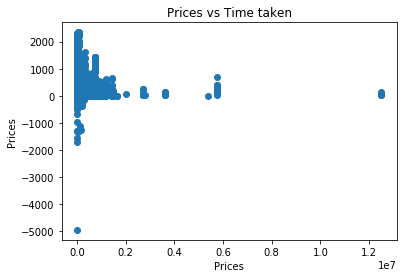

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df4['Price'],df4['days taken'])
plt.xlabel('Prices')
plt.ylabel('Prices')
plt.title('Prices vs Time taken')
plt.show()

In [19]:
df4['Price'][df4['Stage']=='Closed Won'].describe()

count    1.749000e+03
mean     4.112487e+04
std      1.175955e+05
min      0.000000e+00
25%      4.800000e+03
50%      1.215000e+04
75%      3.456000e+04
max      2.709000e+06
Name: Price, dtype: float64

In [20]:
df4['Price'].describe()

count    6.149600e+04
mean     4.793552e+04
std      1.744046e+05
min      0.000000e+00
25%      5.000000e+03
50%      1.620000e+04
75%      4.800000e+04
max      1.250000e+07
Name: Price, dtype: float64

In [21]:
df['days taken'].corr(df['Price'])

0.09066475168336628

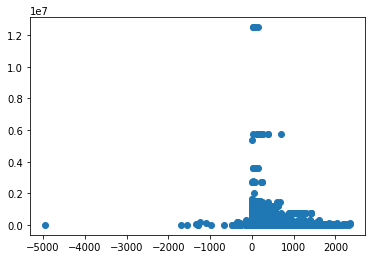

In [22]:
plt.scatter(df4['days taken'],df4['Price'])
plt.show()

### Correlation between variables

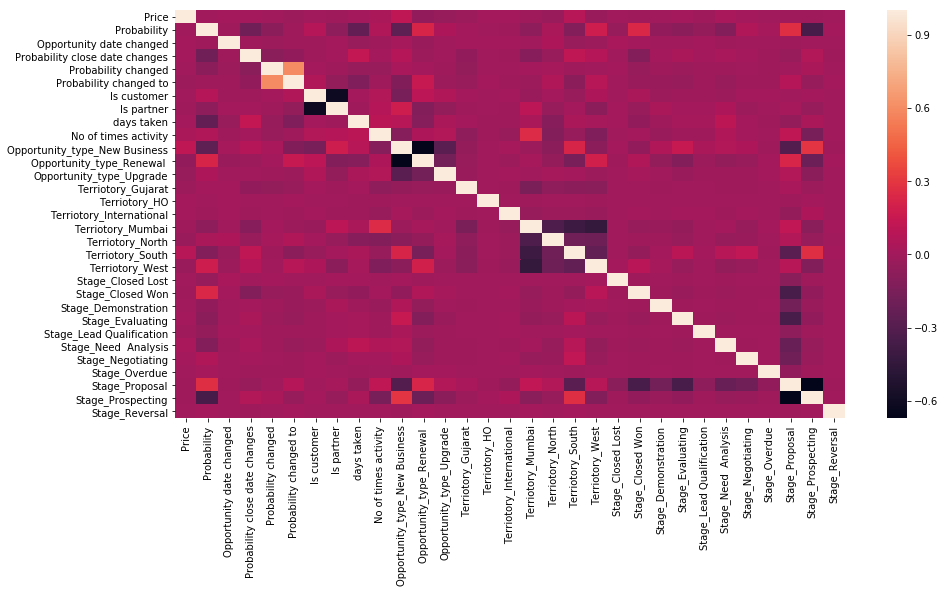

In [23]:
plt.figure(figsize=(15,7.5))
df4_corr=df4.corr()
sns.heatmap(df4_corr)

Text(0.5,1,'Range of prices')

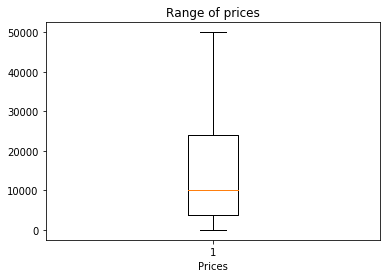

In [24]:
plt.boxplot(df4['Price'][df4['Price']<50000])
plt.xlabel('Prices')
plt.title('Range of prices')

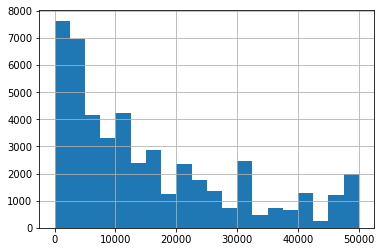

In [25]:
df4['Price'][df4['Price']<50000].hist(bins=20)

### User Level Analysis

In [ ]:
pd.crosstab(df4['FPR'],df4['Stage'])

In [ ]:
#df4['Price'][df4['Stage']=='Closed Won']>5000

### Stage vs Probability analysis

In [ ]:
pd.crosstab(df4['Probability'],df4['Stage']).apply(lambda r: (r/r.sum())*100, axis=1)

In [ ]:
pd.crosstab(df4['Probability'],df4['Stage']).apply(lambda r: (r/r.sum())*100, axis=0)

### Terriotory Analysis

In [ ]:
pd.crosstab(df4['Terriotory'],df4['Stage']).apply(lambda r: (r/r.sum())*100, axis=0)

In [ ]:
pd.crosstab(df4['Terriotory'],df4['Stage']).apply(lambda r: (r/r.sum())*100, axis=1)

### Text Mining

In [ ]:
df4['Opprotunity name'][0].split(" ")

In [58]:
df4[df4['Stage']=='Closed Won'].shape

(1749, 45)

In [94]:
qlc=['MS','PME','MD','FS','FieldSense','PostMaster']

In [95]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
intersection(df4['Opprotunity name'].str.split()[0],qlc)

['PostMaster']

In [92]:
df4['Opprotunity name'].str.split()[0]

['Version',
 'Upgrade',
 '|',
 'IQuinox',
 'ver.6',
 'to',
 'PostMaster',
 'Enterprise',
 'ver.8-2500']

### ML

In [26]:
df4[df4['Price']<50000].describe()

,Price,Probability,Opportunity date changed,Probability close date changes,Probability changed,Probability changed to,Is customer,Is partner,days taken,No of times activity,...,Stage_Closed Won,Stage_Demonstration,Stage_Evaluating,Stage_Lead Qualification,Stage_Need Analysis,Stage_Negotiating,Stage_Overdue,Stage_Proposal,Stage_Prospecting,Stage_Reversal
count,48066.000000,48066.000000,48066.000000,48066.000000,48066.000000,48066.000000,48066.000000,48066.000000,48066.000000,48066.000000,...,48066.000000,48066.000000,48066.000000,48066.000000,48066.00000,48066.000000,48066.000000,48066.000000,48066.000000,48066.000000
mean,15163.341323,52.890609,0.014022,0.553593,0.287230,14.727146,0.969438,0.081430,128.095598,16.815587,...,0.030208,0.008447,0.028627,0.001415,0.00776,0.006221,0.000853,0.802605,0.103878,0.000062
std,14018.085878,26.486211,0.150629,0.605231,0.574149,32.996646,0.172130,0.273497,221.545521,15.229995,...,0.171162,0.091518,0.166758,0.037587,0.08775,0.078626,0.029194,0.398037,0.305105,0.007900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4944.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3750.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,10000.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,24000.000000,75.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,146.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
max,49988.000000,100.000000,2.000000,2.000000,2.000000,100.000000,1.000000,1.000000,2321.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sales_stage= pd.read_csv('C:/Users/QLC/Downloads/FINAL_PYTHON.csv',encoding = "ISO-8859-1")
sales_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38250 entries, 0 to 38249
Data columns (total 30 columns):
Company                           38250 non-null object
Industry                          38250 non-null object
Price                             38250 non-null float64
Opportunity start date            38250 non-null object
Probability                       38250 non-null int64
Opportunity date changed          38250 non-null int64
Probability close date changes    38250 non-null int64
Probability changed               38250 non-null int64
Probability changed to            38250 non-null int64
Close                             38250 non-null object
Is customer                       38250 non-null int64
Is partner                        38250 non-null int64
Source                            38250 non-null object
Terriotory                        38250 non-null object
Opportunity type                  38250 non-null object
FPR                               38250 non-null object
S

In [28]:
Opportunity_type_dummies=pd.get_dummies(sales_stage["Outcome"],prefix='Outcome').iloc[:,1:]
sales_stage2=pd.concat([sales_stage,Opportunity_type_dummies],axis=1)
#model1.fit(X_train,y_train)
#y_pred=model1.predict(X_test)
#sales_stage2.columns
#poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

In [29]:
X = sales_stage2[['Outcome_Closed Won','Outcome_Demonstration','Outcome_Evaluating', 'Outcome_Lead Qualification','Outcome_Need  Analysis','Outcome_Negotiating', 'Outcome_Overdue','Outcome_Proposal', 'Outcome_Prospecting']]
y = sales_stage2['Probability']

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model1 = LinearRegression(fit_intercept=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [34]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred=model1.predict(X_test)

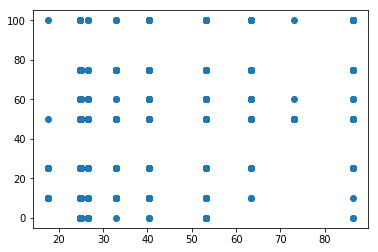

Index(['Outcome_Closed Won', 'Outcome_Demonstration', 'Outcome_Evaluating',
       'Outcome_Lead Qualification', 'Outcome_Need  Analysis',
       'Outcome_Negotiating', 'Outcome_Overdue', 'Outcome_Proposal',
       'Outcome_Prospecting'],
      dtype='object')


array([61.30867635,  7.85842054, 15.28180093, -7.34352051,  1.62752417,
       38.44913376, 48.09189314, 28.21065708, -0.28440971])

In [36]:
plt.scatter(y_pred,y_test)
plt.show()
print(X_train.columns)
model1.coef_

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

479.69932326732095

### Random forest trial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sales_stage= pd.read_csv('C:/Users/QLC/Downloads/FINAL_PYTHON.csv',encoding = "ISO-8859-1")
sales_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38250 entries, 0 to 38249
Data columns (total 30 columns):
Company                           38250 non-null object
Industry                          38250 non-null object
Price                             38250 non-null float64
Opportunity start date            38250 non-null object
Probability                       38250 non-null int64
Opportunity date changed          38250 non-null int64
Probability close date changes    38250 non-null int64
Probability changed               38250 non-null int64
Probability changed to            38250 non-null int64
Close                             38250 non-null object
Is customer                       38250 non-null int64
Is partner                        38250 non-null int64
Source                            38250 non-null object
Terriotory                        38250 non-null object
Opportunity type                  38250 non-null object
FPR                               38250 non-null object
S

In [2]:
X = sales_stage[['Probability','Price','Opportunity date changed']]
y = sales_stage['Outcome']
X.head()
y.head()

0       Proposal
1       Proposal
2       Proposal
3     Closed Won
4    Prospecting
Name: Outcome, dtype: object

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [4]:
clf_1 = RandomForestClassifier(n_estimators=120,criterion='gini',max_features= None,max_depth =20)

In [5]:
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
y_pred=clf_1.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
accuracy_clf_1 = accuracy_score(y_test, y_pred)
accuracy_clf_1

[[  12    0    1    2    0    0    0    0  115   18]
 [   0    9    0    1    0    0    1    0  233    2]
 [   2    0    4    2    0    0    0    0   77   27]
 [   1    0    1   53    0    4    0    0  239  200]
 [   0    0    0    0    0    0    0    0   16    5]
 [   5    0    0    0    0   43    1    0  138   16]
 [   0    2    0    1    0    1   27    0   96    2]
 [   0    0    0    0    0    0    0    1   10    0]
 [  11   42    3   20    0    7   13    0 8118   91]
 [   7    3    3   10    0   12    1    0  614 1152]]


0.8208278867102397

### Optimization

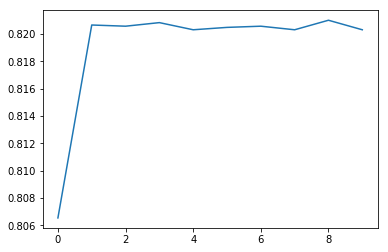

In [8]:
l=[]
for i in np.arange(1,500,50):
    X = sales_stage[['Probability','Price']]
    y = sales_stage['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)
    clf_1 = RandomForestClassifier(n_estimators=i,criterion='gini',max_features= None,max_depth =20)
    clf_1.fit(X_train,y_train)
    y_pred=clf_1.predict(X_test)
    #print(confusion_matrix(y_test, y_pred))
    from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
    accuracy_clf_1 = accuracy_score(y_test, y_pred)
    l.append(accuracy_clf_1)

plt.plot(l)
plt.show()

### Data imbalance

In [9]:
sales_stage['Outcome'].value_counts()[0]/sales_stage['Outcome'].value_counts().sum()+sales_stage['Outcome'].value_counts()[1]/sales_stage['Outcome'].value_counts().sum()

0.8793725490196078

In [10]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
sales_stage.head()

,Company,Industry,Price,Opportunity start date,Probability,Opportunity date changed,Probability close date changes,Probability changed,Probability changed to,Close,...,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,counter,Outcome
0,113 INF TA (BN) RAJPUT,Government & PSU's,7950.0,3/19/2012,75,0,0,0,0,3/19/2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Proposal
1,1Earth,Mnfg - Construction,48000.0,8/14/2015,50,0,2,1,100,8/31/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Proposal
2,23 Medium Regiment,FMCG,12900.0,3/31/2012,100,0,0,0,0,11/22/2012,...,PME AV,PME WF,NaN,NaN,NaN,NaN,NaN,NaN,1,Proposal
3,23 Medium Regiment,FMCG,12900.0,3/31/2012,100,0,0,0,0,11/22/2012,...,PME AV,PME WF,NaN,NaN,NaN,NaN,NaN,NaN,2,Closed Won
4,24 Frames Digital,Advertising/Media,24000.0,9/1/2012,0,0,0,0,0,9/1/2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Prospecting


### Undersampling process

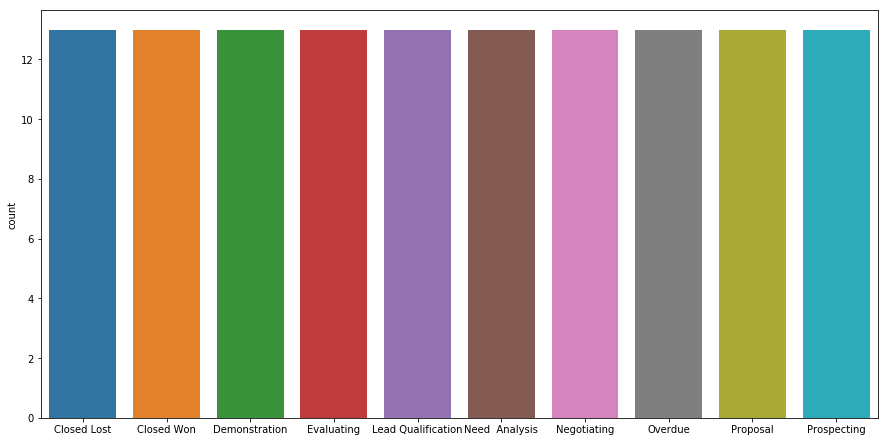

In [12]:
X = sales_stage[['Probability','Price','counter']]
y = sales_stage['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

from imblearn.under_sampling import RandomUnderSampler

# Create the samplers
plt.figure(figsize=(15,7.5))
rus = RandomUnderSampler(random_state=9)
X_sample2, y_sample2 =  rus.fit_sample(X_train, y_train)
sns.countplot(y_sample2)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
rf2 = RandomForestClassifier(random_state=9)
rf2.fit(X_sample2, y_sample2)
y_pred=rf2.predict(X_test)
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
accuracy_clf_1 = accuracy_score(y_test, y_pred)
print(accuracy_clf_1)
print('Precision score',precision_score(y_test, y_pred, average=None))
#print ("f1_score", f1_score(y_test, rf2.predict(X_test)))
#print (precision_score(y_test, rf2.predict(X_test),average=None))
print ('Recall score',recall_score(y_test,y_pred,average=None))
#print (roc_auc_score(y_test, rf2.predict(X_test),average=None))
#print (confusion_matrix(y_test, rf2.predict(X_test),average=None))

0.19119825708061003
Precision score [0.04202586 0.08316222 0.02690058 0.08761528 0.00591017 0.05494505
 0.03307276 0.00414938 0.85048232 0.55930931]
Recall score [0.26351351 0.32926829 0.20535714 0.26706827 0.23809524 0.24630542
 0.42635659 0.45454545 0.12739314 0.41342952]


### Oversampling process 

In [14]:
sales_stage.head()

,Company,Industry,Price,Opportunity start date,Probability,Opportunity date changed,Probability close date changes,Probability changed,Probability changed to,Close,...,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,counter,Outcome
0,113 INF TA (BN) RAJPUT,Government & PSU's,7950.0,3/19/2012,75,0,0,0,0,3/19/2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Proposal
1,1Earth,Mnfg - Construction,48000.0,8/14/2015,50,0,2,1,100,8/31/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Proposal
2,23 Medium Regiment,FMCG,12900.0,3/31/2012,100,0,0,0,0,11/22/2012,...,PME AV,PME WF,NaN,NaN,NaN,NaN,NaN,NaN,1,Proposal
3,23 Medium Regiment,FMCG,12900.0,3/31/2012,100,0,0,0,0,11/22/2012,...,PME AV,PME WF,NaN,NaN,NaN,NaN,NaN,NaN,2,Closed Won
4,24 Frames Digital,Advertising/Media,24000.0,9/1/2012,0,0,0,0,0,9/1/2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Prospecting


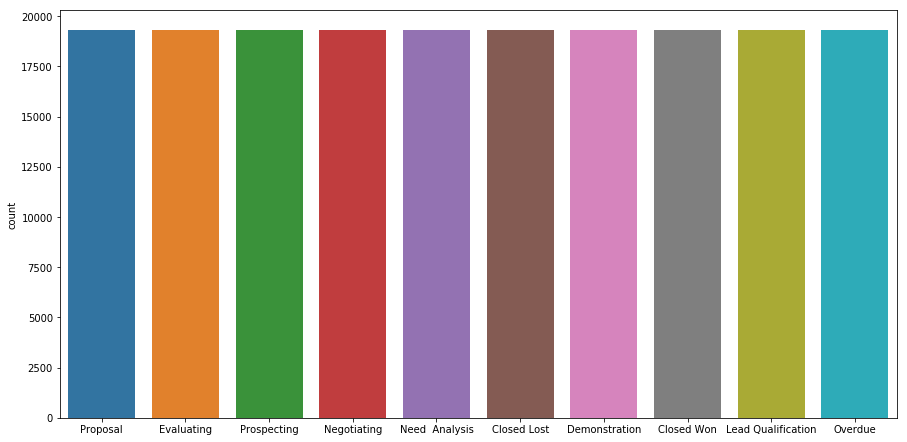

In [15]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
plt.figure(figsize=(15,7.5))
ros = RandomOverSampler(random_state=9)
X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
sns.countplot(y_sample5)
#cc = ClusterCentroids(random_state=9)
#X_sample3, y_sample3 = cc.fit_sample(X_train, y_train)
#sns.countplot(y_sample3)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
rf5 = RandomForestClassifier(random_state=9)
rf5.fit(X_sample5, y_sample5)
y_pred = rf5.predict(X_test)
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
accuracy_clf_1 = accuracy_score(y_test, y_pred)
print(accuracy_clf_1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

0.5179956427015251
[[  26    1   12    5    4   19    9    0   47   25]
 [   5   98    4    5    1    2    6    2  108   15]
 [   5    5   21   15   10    9    5    0   29   13]
 [  18    9   38  201   18   21   19    1  131   42]
 [   0    1    3    2    2    1    0    0    8    4]
 [  15    3    8    6   11   63    6    0   60   31]
 [   2    9    2    1    0    5   46    3   55    6]
 [   0    1    0    1    0    1    1    2    5    0]
 [ 441  608  465  502   87  399  508   80 4727  488]
 [  99   20  101  200  174   94   49    4  303  758]]


In [17]:
print('Precision score',precision_score(y_test, y_pred, average=None))
#print ("f1_score", f1_score(y_test, rf2.predict(X_test)))
#print (precision_score(y_test, rf2.predict(X_test),average=None))
print ('Recall score',recall_score(y_test,y_pred,average=None))

Precision score [0.04255319 0.12980132 0.03211009 0.21428571 0.00651466 0.10260586
 0.07087827 0.02173913 0.8636945  0.54848046]
Recall score [0.17567568 0.39837398 0.1875     0.40361446 0.0952381  0.31034483
 0.35658915 0.18181818 0.5691752  0.42064373]


### Increasing no of parameters

In [18]:
#import matplotlib.pyplot as plt
#df['Price'].hist()
#plt.show()
import sys
import warnings
import pandas as pd
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
    
df=pd.read_csv('C:/Users/QLC/Desktop/Sales_Forecast_project/Opportunity_data.csv',encoding = "ISO-8859-1")
df.head()
df.tail()
Opportunity_type_dummies=pd.get_dummies(df['Opportunity type'],prefix='Opportunity_type').iloc[:,1:]
df1=pd.concat([df,Opportunity_type_dummies],axis=1)
Terriotory_dummies=pd.get_dummies(df1['Terriotory'],prefix='Terriotory').iloc[:,1:]
df2=pd.concat([df1,Terriotory_dummies],axis=1)
Source_dummies=pd.get_dummies(df1['Source'],prefix='Source').iloc[:,1:]
df3=pd.concat([df2,Source_dummies],axis=1)
Industry_dummies=pd.get_dummies(df1['Industry'],prefix='Industry').iloc[:,1:]
df4=pd.concat([df3,Industry_dummies],axis=1)
Opportunity_source_dummies=pd.get_dummies(df1['Opportunity source'],prefix='Opportunity source').iloc[:,1:]
df5=pd.concat([df4,Opportunity_source_dummies],axis=1)
Opportunity_source_dummies=pd.get_dummies(df1['Opportunity source'],prefix='Opportunity source').iloc[:,1:]
df6=pd.concat([df5,Opportunity_source_dummies],axis=1)
list(df6.columns)

['Company',
 'Industry',
 'Opprotunity name',
 'Price',
 'BU',
 'Opportunity date',
 'Probability',
 'Opportunity date changed',
 'Probability close date changes',
 'Probability changed',
 'Probability changed to',
 'Close date',
 'Is customer',
 'Is partner',
 'Source',
 'Terriotory',
 'Opportunity type',
 'Stage',
 'FPR',
 'SPR',
 'Terriotory.1',
 'Opportunity source',
 'days taken',
 'No of times activity',
 'Opportunity_type_New Business',
 'Opportunity_type_Renewal ',
 'Opportunity_type_Upgrade',
 'Terriotory_Gujarat',
 'Terriotory_HO',
 'Terriotory_International',
 'Terriotory_Mumbai',
 'Terriotory_North',
 'Terriotory_South',
 'Terriotory_West',
 'Source_CC-Cold Call',
 'Source_CC-Existing Customer',
 'Source_CC-RevivedDead&Lost',
 'Source_Cold Call',
 'Source_DIY',
 'Source_Download',
 'Source_Email Campaign',
 'Source_Employee Referral',
 'Source_Existing Client ',
 'Source_Existing Reseller ',
 'Source_Facebook',
 'Source_Google',
 'Source_New Reseller',
 'Source_Reference',


In [19]:
X = df6[['Price',
 'Probability',
 'Opportunity date changed',
 'Probability close date changes',
 'Probability changed',
 'Probability changed to',
 'Is customer',
 'Is partner',
 'days taken',
 'No of times activity',
 'Opportunity_type_New Business',
 'Opportunity_type_Renewal ',
 'Opportunity_type_Upgrade',
 'Terriotory_Gujarat',
 'Terriotory_HO',
 'Terriotory_International',
 'Terriotory_Mumbai',
 'Terriotory_North',
 'Terriotory_South',
 'Terriotory_West',
 'Source_CC-Cold Call',
 'Source_CC-Existing Customer',
 'Source_CC-RevivedDead&Lost',
 'Source_Cold Call',
 'Source_DIY',
 'Source_Download',
 'Source_Email Campaign',
 'Source_Employee Referral',
 'Source_Existing Client ',
 'Source_Existing Reseller ',
 'Source_Facebook',
 'Source_Google',
 'Source_New Reseller',
 'Source_Reference',
 'Source_Renewal',
 'Source_Walk In',
 'Source_Web Enquiry',
 'Source_xxxNew Customer',
 'Industry_Advertising & Public Relations',
 'Industry_Association',
 'Industry_Automotive',
 'Industry_Chemicals',
 'Industry_Corporate Training',
 'Industry_Dealers-Equipments',
 'Industry_Education',
 'Industry_Educational Institutes',
 'Industry_Electronics',
 'Industry_Entertainment',
 'Industry_FMCG',
 'Industry_Finance & Insurance',
 'Industry_Foods & Beverages',
 'Industry_Gems & Jewellery',
 "Industry_Government & PSU's",
 'Industry_Healthcare',
 'Industry_Hospitality',
 'Industry_IT / BPO',
 'Industry_Import / Export',
 'Industry_Individual',
 'Industry_Logistics',
 'Industry_Manpower Consulting / Training',
 'Industry_Media',
 'Industry_Mnfg - Cement',
 'Industry_Mnfg - Construction',
 'Industry_Mnfg - Consumer Durables',
 'Industry_Mnfg - Energy',
 'Industry_Mnfg - Engineering',
 'Industry_Mnfg - Packaging',
 'Industry_Mnfg - Steel',
 'Industry_Mnfg - Textile',
 'Industry_NGO',
 'Industry_Pharma',
 'Industry_Professional & Consultancy Services',
 'Industry_Real Estate',
 'Industry_Retail',
 'Industry_Shares and Broking',
 'Industry_Shipping',
 'Industry_Stock Brokers',
 'Industry_System Integrator/VAR',
 'Industry_Telecom',
 'Industry_Timber & Furniture',
 'Industry_Transport',
 'Industry_Travels',
 'Opportunity source_CC-Cold Call',
 'Opportunity source_CC-Existing Customer',
 'Opportunity source_CC-RevivedDead&Lost',
 'Opportunity source_Cold Call',
 'Opportunity source_DIY',
 'Opportunity source_Download',
 'Opportunity source_Email Campaign',
 'Opportunity source_Employee Referral',
 'Opportunity source_Existing Client ',
 'Opportunity source_Existing Reseller ',
 'Opportunity source_Facebook',
 'Opportunity source_Google',
 'Opportunity source_New Reseller',
 'Opportunity source_Reference',
 'Opportunity source_Renewal',
 'Opportunity source_Walk In',
 'Opportunity source_Web Enquiry',
 'Opportunity source_xxxNew Customer',
        'Price']]
y = df6['Stage']

(61496, 119)


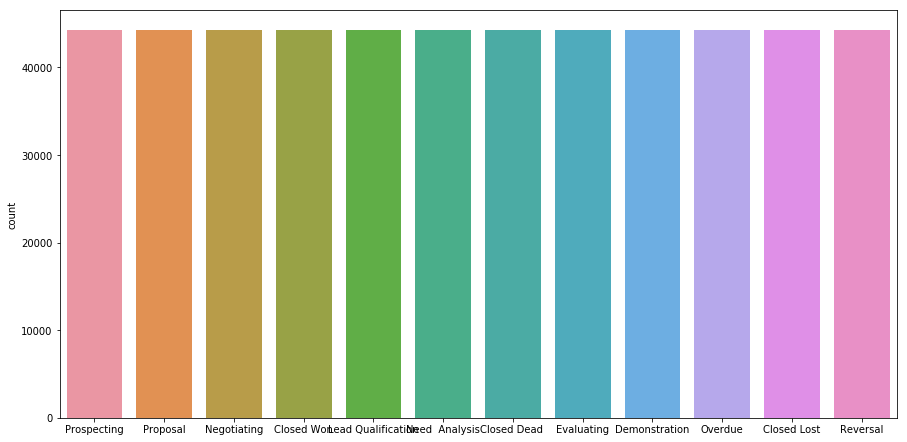

In [20]:
print(X.shape)
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=23)

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
plt.figure(figsize=(15,7.5))
ros = RandomOverSampler(random_state=9)
X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
sns.countplot(y_sample5)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
rf5 = RandomForestClassifier(random_state=9)
rf5.fit(X_sample5, y_sample5)
y_pred = rf5.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
accuracy_clf_1 = accuracy_score(y_test, y_pred)
print(accuracy_clf_1)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
print(confusion_matrix(y_test, y_pred))
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print('Precision score',precision_score(y_test, y_pred, average=None))
#print ("f1_score", f1_score(y_test, rf2.predict(X_test)))
print ('Recall score',recall_score(y_test,y_pred,average=None))

0.8891056910569106
[[   9    0    0    1    4    0    1    0    0   29    6]
 [   1    1    0    0    0    0    0    0    0   10    0]
 [   0    0   23    0    1    0    0    2    2  148    3]
 [   0    0    0   22    1    0    0    2    0   12    2]
 [   1    0    2    0  104    1    0    1    0   54   10]
 [   0    0    0    0    0    8    1    0    0    2    1]
 [   1    0    0    0    0    0   56    0    0   13    3]
 [   1    0    3    0    1    0    0   27    0   16    2]
 [   0    0    0    0    0    0    0    0    1    4    0]
 [  10    4  140    3   10    0    9   11    2 4748   28]
 [   4    0    2    1   10    0    2    0    0  104  469]]
Precision score [0.33333333 0.2        0.13529412 0.81481481 0.79389313 0.88888889
 0.8115942  0.62790698 0.2        0.92373541 0.89503817]
Recall score [0.18       0.08333333 0.12849162 0.56410256 0.60115607 0.66666667
 0.76712329 0.54       0.2        0.95629406 0.79222973]


In [24]:
df4['Stage'].value_counts()
l=['Demon','Reversal','Proposal','Prospecting']

Proposal              49277
Prospecting            6154
Evaluating             1798
Closed Won             1749
Need  Analysis          761
Closed Dead             511
Negotiating             508
Demonstration           467
Closed Lost             133
Lead Qualification       77
Overdue                  58
Reversal                  3
Name: Stage, dtype: int64

### Train test optimisation

In [60]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [66]:
print(X.shape)
y.shape

for i in list(np.linspace(0.1, 0.9, 8)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=23)
    ros = RandomOverSampler(random_state=9)
    X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
    rf5 = RandomForestClassifier(random_state=9)
    rf5.fit(X_sample5, y_sample5)
    y_pred = rf5.predict(X_test)
    accuracy_clf_1 = accuracy_score(y_test, y_pred)
    print(i,accuracy_clf_1)


#plt.figure(figsize=(15,7.5))
#sns.countplot(y_sample5)



#print(confusion_matrix(y_test, y_pred))
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print('Precision score',precision_score(y_test, y_pred, average=None))
#print ("f1_score", f1_score(y_test, rf2.predict(X_test)))
#print ('Recall score',recall_score(y_test,y_pred,average=None))

(61496, 119)
0.1 0.8891056910569106
0.2142857142857143 0.8889816360601002
0.3285714285714286 0.8883005048005543
0.44285714285714284 0.8891092017331277
0.5571428571428572 0.8822344803432274
0.6714285714285715 0.8822019326245428
0.7857142857142857 0.8719344357292163
0.9 0.861979872441144


### Adding FPR and SPR also in model

In [70]:
#import matplotlib.pyplot as plt
#df['Price'].hist()
#plt.show()
import sys
import warnings
import pandas as pd
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
    
df=pd.read_csv('C:/Users/QLC/Desktop/Sales_Forecast_project/Opportunity_data.csv',encoding = "ISO-8859-1")
df.head()
df.tail()
Opportunity_type_dummies=pd.get_dummies(df['Opportunity type'],prefix='Opportunity_type').iloc[:,1:]
df1=pd.concat([df,Opportunity_type_dummies],axis=1)
Terriotory_dummies=pd.get_dummies(df1['Terriotory'],prefix='Terriotory').iloc[:,1:]
df2=pd.concat([df1,Terriotory_dummies],axis=1)
Source_dummies=pd.get_dummies(df1['Source'],prefix='Source').iloc[:,1:]
df3=pd.concat([df2,Source_dummies],axis=1)
Industry_dummies=pd.get_dummies(df1['Industry'],prefix='Industry').iloc[:,1:]
df4=pd.concat([df3,Industry_dummies],axis=1)
Opportunity_source_dummies=pd.get_dummies(df1['Opportunity source'],prefix='Opportunity source').iloc[:,1:]
df5=pd.concat([df4,Opportunity_source_dummies],axis=1)
Opportunity_source_dummies=pd.get_dummies(df1['Opportunity source'],prefix='Opportunity source').iloc[:,1:]
df6=pd.concat([df5,Opportunity_source_dummies],axis=1)
FPR_dummies=pd.get_dummies(df1['FPR'],prefix='FPR').iloc[:,1:]
df7=pd.concat([df6,FPR_dummies],axis=1)
SPR_dummies=pd.get_dummies(df1['SPR'],prefix='SPR').iloc[:,1:]
df8=pd.concat([df7,SPR_dummies],axis=1)
list(df8.columns)

['Company',
 'Industry',
 'Opprotunity name',
 'Price',
 'BU',
 'Opportunity date',
 'Probability',
 'Opportunity date changed',
 'Probability close date changes',
 'Probability changed',
 'Probability changed to',
 'Close date',
 'Is customer',
 'Is partner',
 'Source',
 'Terriotory',
 'Opportunity type',
 'Stage',
 'FPR',
 'SPR',
 'Terriotory.1',
 'Opportunity source',
 'days taken',
 'No of times activity',
 'Opportunity_type_New Business',
 'Opportunity_type_Renewal ',
 'Opportunity_type_Upgrade',
 'Terriotory_Gujarat',
 'Terriotory_HO',
 'Terriotory_International',
 'Terriotory_Mumbai',
 'Terriotory_North',
 'Terriotory_South',
 'Terriotory_West',
 'Source_CC-Cold Call',
 'Source_CC-Existing Customer',
 'Source_CC-RevivedDead&Lost',
 'Source_Cold Call',
 'Source_DIY',
 'Source_Download',
 'Source_Email Campaign',
 'Source_Employee Referral',
 'Source_Existing Client ',
 'Source_Existing Reseller ',
 'Source_Facebook',
 'Source_Google',
 'Source_New Reseller',
 'Source_Reference',


In [71]:
X=df8[['Price',
 'Probability',
 'Opportunity date changed',
 'Probability close date changes',
 'Probability changed',
 'Probability changed to',
 'Is customer',
 'Is partner',
 'days taken',
 'No of times activity',
 'Opportunity_type_New Business',
 'Opportunity_type_Renewal ',
 'Opportunity_type_Upgrade',
 'Terriotory_Gujarat',
 'Terriotory_HO',
 'Terriotory_International',
 'Terriotory_Mumbai',
 'Terriotory_North',
 'Terriotory_South',
 'Terriotory_West',
 'Source_CC-Cold Call',
 'Source_CC-Existing Customer',
 'Source_CC-RevivedDead&Lost',
 'Source_Cold Call',
 'Source_DIY',
 'Source_Download',
 'Source_Email Campaign',
 'Source_Employee Referral',
 'Source_Existing Client ',
 'Source_Existing Reseller ',
 'Source_Facebook',
 'Source_Google',
 'Source_New Reseller',
 'Source_Reference',
 'Source_Renewal',
 'Source_Walk In',
 'Source_Web Enquiry',
 'Source_xxxNew Customer',
 'Industry_Advertising & Public Relations',
 'Industry_Association',
 'Industry_Automotive',
 'Industry_Chemicals',
 'Industry_Corporate Training',
 'Industry_Dealers-Equipments',
 'Industry_Education',
 'Industry_Educational Institutes',
 'Industry_Electronics',
 'Industry_Entertainment',
 'Industry_FMCG',
 'Industry_Finance & Insurance',
 'Industry_Foods & Beverages',
 'Industry_Gems & Jewellery',
 "Industry_Government & PSU's",
 'Industry_Healthcare',
 'Industry_Hospitality',
 'Industry_IT / BPO',
 'Industry_Import / Export',
 'Industry_Individual',
 'Industry_Logistics',
 'Industry_Manpower Consulting / Training',
 'Industry_Media',
 'Industry_Mnfg - Cement',
 'Industry_Mnfg - Construction',
 'Industry_Mnfg - Consumer Durables',
 'Industry_Mnfg - Energy',
 'Industry_Mnfg - Engineering',
 'Industry_Mnfg - Packaging',
 'Industry_Mnfg - Steel',
 'Industry_Mnfg - Textile',
 'Industry_NGO',
 'Industry_Pharma',
 'Industry_Professional & Consultancy Services',
 'Industry_Real Estate',
 'Industry_Retail',
 'Industry_Shares and Broking',
 'Industry_Shipping',
 'Industry_Stock Brokers',
 'Industry_System Integrator/VAR',
 'Industry_Telecom',
 'Industry_Timber & Furniture',
 'Industry_Transport',
 'Industry_Travels',
 'Opportunity source_CC-Cold Call',
 'Opportunity source_CC-Existing Customer',
 'Opportunity source_CC-RevivedDead&Lost',
 'Opportunity source_Cold Call',
 'Opportunity source_DIY',
 'Opportunity source_Download',
 'Opportunity source_Email Campaign',
 'Opportunity source_Employee Referral',
 'Opportunity source_Existing Client ',
 'Opportunity source_Existing Reseller ',
 'Opportunity source_Facebook',
 'Opportunity source_Google',
 'Opportunity source_New Reseller',
 'Opportunity source_Reference',
 'Opportunity source_Renewal',
 'Opportunity source_Walk In',
 'Opportunity source_Web Enquiry',
 'Opportunity source_xxxNew Customer',
 'Opportunity source_CC-Cold Call',
 'Opportunity source_CC-Existing Customer',
 'Opportunity source_CC-RevivedDead&Lost',
 'Opportunity source_Cold Call',
 'Opportunity source_DIY',
 'Opportunity source_Download',
 'Opportunity source_Email Campaign',
 'Opportunity source_Employee Referral',
 'Opportunity source_Existing Client ',
 'Opportunity source_Existing Reseller ',
 'Opportunity source_Facebook',
 'Opportunity source_Google',
 'Opportunity source_New Reseller',
 'Opportunity source_Reference',
 'Opportunity source_Renewal',
 'Opportunity source_Walk In',
 'Opportunity source_Web Enquiry',
 'Opportunity source_xxxNew Customer',
 'FPR_Abhishek Agarwal',
 'FPR_Administrator',
 'FPR_Agney Kumar',
 'FPR_Ajay Singh',
 'FPR_Akshada Gaikwad',
 "FPR_Albertina D'Souza",
 'FPR_Alka Kargutkar',
 'FPR_Alok Mishra',
 'FPR_Amit Choudhary',
 'FPR_Amit Gharat',
 'FPR_Amit Karnwal',
 'FPR_Amit Mashelkar',
 'FPR_Amit Warghade',
 'FPR_Amita Jha',
 'FPR_AnandPrasad Kamble',
 'FPR_Ankit Gala',
 'FPR_Ankit Rathi',
 'FPR_Ankit Shah',
 'FPR_Anurag Sharma',
 'FPR_Anwar Shaikh',
 'FPR_Arun Kumar',
 'FPR_Arvind Bansal',
 'FPR_Asmita Shinde',
 'FPR_Atul Shinde',
 'FPR_Avinash Shirsat',
 'FPR_Balaji D',
 'FPR_Balbir Negi',
 'FPR_Bhagyashree Shetty ',
 'FPR_Bipin Mangaonkar',
 'FPR_Chandramoorthy M',
 'FPR_Chandrashekar Tumoju',
 'FPR_Chirag Baxi',
 'FPR_Chitra Suresh',
 'FPR_Cyrus Lentin',
 'FPR_Darshana Pagare',
 'FPR_Deepa Poojary',
 'FPR_Deepak Sonavane',
 'FPR_Deepali Singh',
 'FPR_Devaraj N',
 'FPR_Devesh Kumar',
 'FPR_Dhanesh R',
 'FPR_Dhvani Shah',
 'FPR_Dipa Subramanian',
 'FPR_Dipesh Ande',
 'FPR_Divya Pillai',
 'FPR_Divyesh Sharma',
 'FPR_Elan ',
 'FPR_Esha Rana',
 'FPR_Gayatri Rangaraj',
 'FPR_Govind Jha',
 'FPR_Harish Venu',
 'FPR_Jaya Prakash',
 'FPR_Jayant Bundela',
 'FPR_Jayashri Phulore',
 'FPR_Jitender Singh',
 'FPR_Jitendra Chilwal',
 'FPR_Jitendra Rawat',
 'FPR_Jyotirmay Parida',
 'FPR_K Sridhar',
 'FPR_Kalaiyarshi Raj',
 'FPR_Kalpita Upare',
 'FPR_Kamlesh Date',
 'FPR_Kaushal Kumar',
 'FPR_Keshav Kumar',
 'FPR_Kiran Malekar',
 'FPR_Kiran Patil ',
 'FPR_Krishna Rao Jadhov',
 'FPR_Lalit  Trivedi',
 'FPR_Lankesh Meshram',
 'FPR_Lathamani ',
 'FPR_Lenryl Dsouza',
 'FPR_Maglin Nadar',
 'FPR_Mahesh Kedia',
 'FPR_Majid Khan',
 'FPR_Malvin Neil',
 'FPR_Mangesh Lad',
 'FPR_Mayank Porwal',
 'FPR_Mayuri Patil',
 'FPR_Mayuri Sen',
 'FPR_Meeraa Ravisankar',
 'FPR_Momina Shaikh',
 'FPR_Naved Agah',
 'FPR_Nayan Turakhia',
 'FPR_Nesarajen M',
 'FPR_Nigam Parikh',
 'FPR_Nikhil Sagade',
 'FPR_Nikhil Sagade - New',
 'FPR_Nilesh Shah',
 'FPR_Nisha M',
 'FPR_Nitin Mahangare',
 'FPR_Nitin Upadhyay',
 'FPR_Pallavi Shinde',
 'FPR_Pankaj Kashyap',
 'FPR_Pankaj Mishra',
 'FPR_Pankaj Rana',
 'FPR_Pankaj Sharma',
 'FPR_Pavitra Kurasala',
 'FPR_Piyush Srivastava',
 'FPR_Pooja Bhatt',
 'FPR_Pooja Lasunkute',
 'FPR_Pooja Mandal',
 'FPR_Prachi Bidwe',
 'FPR_Pranav Trivedi',
 'FPR_Pranay Pawar',
 'FPR_Prateek Gupta',
 'FPR_Pratik Bhosale',
 'FPR_Pratima Shahi',
 'FPR_Praveen Singh',
 'FPR_Preeti Yadav',
 'FPR_Pritam Singh',
 'FPR_Pummy Kumari',
 'FPR_Purnima Singh',
 'FPR_Rahul Sanghavi',
 'FPR_Rajesh Singh',
 'FPR_Rajeshwari Baranwal',
 'FPR_Rajneesh Saraswat',
 'FPR_Raju Maru',
 'FPR_Rakesh Joshi',
 'FPR_Rekha Joshi',
 'FPR_Rinki Prajapati',
 'FPR_Robert Chettiar',
 'FPR_Rupali Magar',
 'FPR_S Madhukiran',
 'FPR_S Manjula',
 'FPR_Sachin Garg',
 'FPR_Sachin Maini',
 'FPR_Sachin P',
 'FPR_Sandeep Dube',
 'FPR_Sandeep Rathore',
 'FPR_Sandip Patil',
 'FPR_Santosh Goglay',
 'FPR_Santosh Mahapatro',
 'FPR_Sapnika Rao',
 'FPR_Saurabh Bansal',
 'FPR_Shahana Shaikh',
 'FPR_Shivprasad Nair',
 'FPR_Shravani Tambekar',
 'FPR_Shubham Dave',
 'FPR_Shweta Shetty',
 'FPR_Shweta Soni',
 'FPR_Siva Reddy',
 'FPR_Sonal Singh',
 'FPR_Soni Mishra',
 'FPR_Srikanth Manthuri',
 'FPR_Subir Bhattacharya',
 'FPR_Sumit Tiwari',
 'FPR_Sunil Nair',
 'FPR_Sunil Nigam',
 'FPR_Sunny Azad',
 'FPR_Supriya Borkar',
 'FPR_Suraj Gupta',
 'FPR_Swanandi Powale',
 'FPR_Swati Shetty',
 'FPR_Sylvester Mendonca',
 'FPR_Terrence Varghese',
 'FPR_Triny Dsouza',
 'FPR_Uday Yadav',
 'FPR_Udaykumar Biradar',
 'FPR_Uma Satole',
 'FPR_Vandana Sinha',
 'FPR_Vanita Moopnar',
 'FPR_Vanita Sisodia',
 'FPR_Velmurugan G',
 'FPR_Vidyanand Watthore',
 'FPR_Vijay Kumar PC',
 'FPR_Vijayshree Jadhav',
 'FPR_Vikas Mishra',
 'FPR_Vikramaditya PR',
 'FPR_Vinesh Murthy',
 'FPR_Viney Rajput',
 'FPR_Vishesh Chaurasia',
 'SPR_Abhishek Agarwal',
 'SPR_Aditi Sengupta',
 'SPR_Administrator',
 'SPR_Akshada Gaikwad',
 "SPR_Albertina D'Souza",
 'SPR_Alka Kargutkar',
 'SPR_Amit Mashelkar',
 'SPR_Amit Warghade',
 'SPR_Amita Jha',
 'SPR_Anamika De',
 'SPR_AnandPrasad Kamble',
 'SPR_Ankit Gala',
 'SPR_Ankit Rathi',
 'SPR_Ankit Shah',
 'SPR_Anwar Shaikh',
 'SPR_Archana Shetty',
 'SPR_Arun Kumar',
 'SPR_Arvind Bansal',
 'SPR_Asmita Shinde',
 'SPR_Atul Shinde',
 'SPR_Avinash Lotake',
 'SPR_Avinash Shirsat',
 'SPR_Balaji D',
 'SPR_Balbir Negi',
 'SPR_Bhagyashree Shetty ',
 'SPR_Bhaveesh Chandrabose',
 'SPR_Chandramoorthy M',
 'SPR_Chandrashekar Tumoju',
 'SPR_Chirag Baxi',
 'SPR_Darshana Pagare',
 'SPR_Deepa Poojary',
 'SPR_Deepak Sonavane',
 'SPR_Deepali Singh',
 'SPR_Devaraj N',
 'SPR_Dipa Subramanian',
 'SPR_Dipesh Ande',
 'SPR_Divya Pillai',
 'SPR_Divyesh Sharma',
 'SPR_Elan ',
 'SPR_Esha Rana',
 'SPR_Gayatri Rangaraj',
 'SPR_Geet Arora',
 'SPR_Harshali Nagar',
 'SPR_Jaya Prakash',
 'SPR_Jayashri Phulore',
 'SPR_Jitender Singh',
 'SPR_Jitendra Chilwal',
 'SPR_Jitendra Rawat',
 'SPR_Jyotirmay Parida',
 'SPR_Jyotsana Nikam',
 'SPR_K Sridhar',
 'SPR_Kalaiyarshi Raj',
 'SPR_Kalpita Upare',
 'SPR_Kamlesh Date',
 'SPR_Kiran Malekar',
 'SPR_Kiran Patil ',
 'SPR_Krishna Rao Jadhov',
 'SPR_Lathamani ',
 'SPR_Lenryl Dsouza',
 'SPR_Maglin Nadar',
 'SPR_Mahesh Kedia',
 'SPR_Majid Khan',
 'SPR_Malvin Neil',
 'SPR_Mayank Porwal',
 'SPR_Mayuri Patil',
 'SPR_Mayuri Sen',
 'SPR_Meeraa Ravisankar',
 'SPR_Momina Shaikh',
 'SPR_Naved Agah',
 'SPR_Nayan Turakhia',
 'SPR_Nikhil Sagade',
 'SPR_Nikhil Sagade - New',
 'SPR_Nilesh Shah',
 'SPR_Nisha M',
 'SPR_Nitin Mahangare',
 'SPR_Pallavi Shinde',
 'SPR_Pankaj Kashyap',
 'SPR_Pankaj Mishra',
 'SPR_Pankaj Rana',
 'SPR_Pankaj Setia',
 'SPR_Pankaj Sharma',
 'SPR_Pavitra Kurasala',
 'SPR_Piyush Srivastava',
 'SPR_Pooja Bhatt',
 'SPR_Pooja Lasunkute',
 'SPR_Pooja Mandal',
 'SPR_Prachi Bidwe',
 'SPR_Pranav Trivedi',
 'SPR_Pranay Pawar',
 'SPR_Pratik Bhosale',
 'SPR_Pratima Shahi',
 'SPR_Praveen Singh',
 'SPR_Preeti Shetty ',
 'SPR_Preeti Yadav',
 'SPR_Pummy Kumari',
 'SPR_Purnima Singh',
 'SPR_Rahul Sanghavi',
 'SPR_Rajendra Bandkar',
 'SPR_Rajesh Singh',
 'SPR_Rajeshwari Baranwal',
 'SPR_Rajneesh Saraswat',
 'SPR_Raju Maru',
 'SPR_Rakesh Joshi',
 'SPR_Ramesh Tripathi',
 'SPR_Rinki Prajapati',
 'SPR_Rohit Khandelwal',
 'SPR_Roseline Binoj',
 'SPR_Rupali Magar',
 'SPR_Rupali Sawant',
 'SPR_S Madhukiran',
 'SPR_S Manjula',
 'SPR_Sachin Garg',
 'SPR_Sachin Maini',
 'SPR_Sachin P',
 'SPR_Sadhana Rathod',
 'SPR_Sandeep Dube',
 'SPR_Sandeep Rathore',
 'SPR_Sandip Patil',
 'SPR_Sanjeev Pereira',
 'SPR_Santosh Goglay',
 'SPR_Santosh Mahapatro',
 'SPR_Sapnika Rao',
 'SPR_Saurabh Bansal',
 'SPR_Sayantan Das',
 'SPR_Shadab Mukri ',
 'SPR_Shahana Shaikh',
 'SPR_Shivprasad Nair',
 'SPR_Shraddha Shetty',
 'SPR_Shravani Tambekar',
 'SPR_Shrishti Neogi',
 'SPR_Shubham Dave',
 'SPR_Shweta Shetty',
 'SPR_Shweta Soni',
 'SPR_Shwetha Rao',
 'SPR_Shyam Kumar',
 'SPR_Siva Reddy',
 'SPR_Sonal Singh',
 'SPR_Soni Mishra',
 'SPR_Srikanth Manthuri',
 'SPR_Subir Bhattacharya',
 'SPR_Sujeet Upadhyay',
 'SPR_Sumit Tiwari',
 'SPR_Sunny Azad',
 'SPR_Supriya Borkar',
 'SPR_Suraj Gupta',
 'SPR_Suresh Kumar',
 'SPR_Swanandi Powale',
 'SPR_Swati Shetty',
 'SPR_Tejal Sharma',
 'SPR_Terrence Varghese',
 'SPR_Triny Dsouza',
 'SPR_Udaykumar Biradar',
 'SPR_Uma Satole',
 'SPR_Vandana Sinha',
 'SPR_Vanita Moopnar',
 'SPR_Vanita Sisodia',
 'SPR_Velmurugan G',
 'SPR_Vidyanand Watthore',
 'SPR_Vijay Kumar PC',
 'SPR_Vijayshree Jadhav',
 'SPR_Vikramaditya PR',
 'SPR_Vinesh Murthy',
 'SPR_Vishesh Chaurasia']]
y=df8['Stage']

In [72]:
print(X.shape)
y.shape

(61496, 488)


(61496,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [75]:
clf_1 = RandomForestClassifier(n_estimators=120,criterion='gini',max_features= None,max_depth =20)

In [76]:
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
y_pred=clf_1.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
accuracy_clf_1 = accuracy_score(y_test, y_pred)
accuracy_clf_1

[[   22     1     0     1     3     0     3     0     0   113    17]
 [    2     1     0     1     1     0     0     0     0    31     2]
 [    1     0    39     2     3     0     0     3     0   492     7]
 [    0     0     0    64     4     0     0     0     0    69     6]
 [    0     0     0     2   279     1     0     0     0   218    37]
 [    0     0     0     0     1    14     0     0     0     6     3]
 [    2     0     0     0     3     0    86     0     0   123     4]
 [    0     0     1     0     1     0     0    43     0   106     2]
 [    0     0     0     0     0     0     0     0     0    15     0]
 [    5     2    45     0    14     0    15     7     0 14654    42]
 [    3     0     2     4    32     1     4     0     0   477  1307]]


0.89484524906499

In [79]:
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
print('Precision score',precision_score(y_test, y_pred, average=None))
print ('Recall score',recall_score(y_test,y_pred,average=None))

Precision score [0.62857143 0.25       0.44827586 0.86486486 0.81818182 0.875
 0.7962963  0.81132075 0.         0.89879784 0.9159075 ]
Recall score [0.1375     0.02631579 0.07129799 0.44755245 0.51955307 0.58333333
 0.39449541 0.28104575 0.         0.99120671 0.71420765]


### Ensembling methods

In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
decision_clf1 = DecisionTreeClassifier()
decision_clf2 = DecisionTreeClassifier()

In [81]:
# Hard Voting
voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'hard')

voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

In [82]:
accuracy_hard

0.8756030137134804

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
print('Precision score',precision_score(y_test, y_pred, average=None))
print ('Recall score',recall_score(y_test,y_pred,average=None))

In [83]:
# Soft Voting
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

In [84]:
accuracy_soft

0.8797224781830993

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
print('Precision score',precision_score(y_test, y_pred, average=None))
print ('Recall score',recall_score(y_test,y_pred,average=None))